In [18]:
%matplotlib notebook 

import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import grad
from autograd.optimizers import sgd

import scipy.optimize
import matplotlib.pyplot as plot

from collections import OrderedDict

In [19]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [40]:
numpy.random.seed(1234)

In [41]:
from sklearn.datasets import make_blobs

def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

n_dim = 2
x_tra, y_tra = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_tes, y_tes = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

y_tra = label_map(y_tra, [0, 1], 0)
y_tra = label_map(y_tra, [2, 3], 1)
y_tes = label_map(y_tes, [0, 1], 0)
y_tes = label_map(y_tes, [2, 3], 1)

In [42]:
def init_params(n_dim, n_hid, scale=0.01):
    w1 = scale * npr.randn(n_dim, n_hid)
    b1 = numpy.zeros(n_hid)
    w2 = scale * npr.randn(n_hid)
    b2 = numpy.zeros(1)
    
    return OrderedDict({'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2})

In [43]:
def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

def relu(a):
    return numpy.maximum(0., a)

def tanh(a):
    return numpy.tanh(a)

In [65]:
def mlp(x, p, pre=False):   
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    h = tanh(numpy.dot(x, p['w1']) + p['b1'][None,:])
    y = numpy.dot(h, p['w2']) + p['b2']

    if pre:
        return y    
    return sigmoid(y)

In [70]:
def mlp_dist(y, x, p, avg=False):
    y_ = mlp(x, p)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [71]:
def cost(p, i):
    return mlp_dist(y_tra, x_tra, p, avg=True)

mlp_rule = grad(cost)

In [72]:
def _callback(p, i, g):
    if numpy.mod(i, 100) == 0:
        print cost(p, i)

In [73]:
params0 = init_params(n_dim=n_dim, n_hid=10)
params = sgd(mlp_rule, params0, callback=_callback, num_iters=2000, step_size=1., mass=0.)

0.250000411389
0.249915054715
0.249495980825
0.249270288388
0.248976554616
0.206721765483
0.0533728942701
0.0275627047941
0.020051810776
0.0151677625085
0.0113112255548
0.00799128044657
0.00545968465272
0.00379358772948
0.00276153396347
0.00211207775249
0.00168418485904
0.00138797823318
0.00117370395995
0.00101286032248


In [55]:
# visualize data 
def vis_data(x, y = None, c='r'):
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [61]:
def vis_decision_boundary(p, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    pred = mlp(numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1), p)
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


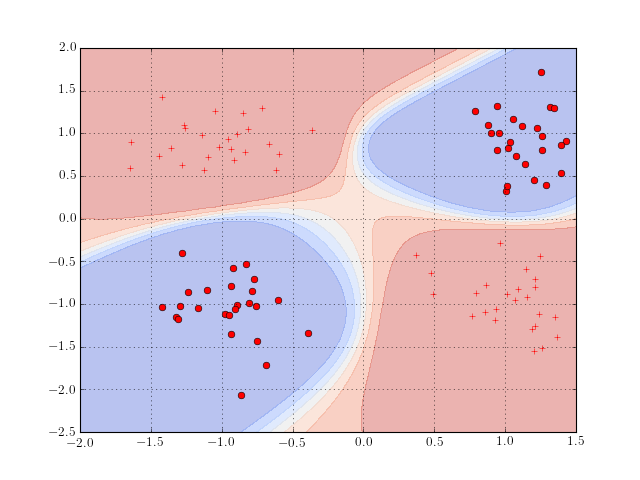

In [62]:
plot.figure()

vis_data(x_tra, y_tra, c='r')

#plt1 = vis_decision_boundary(params0, 'k--')
plt1 = vis_decision_boundary(params, 'k--')

plot.show()

In [64]:
tra_er = numpy.sum(numpy.abs(numpy.round(mlp(x_tra, params)) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(numpy.round(mlp(x_tes, params)) - y_tes)) / numpy.float(len(y_tes))

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 0.0, Test error rate 0.0
